In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import curve_fit
from astropy import constants as const
from scipy.optimize import curve_fit
import warnings
from scipy.stats import bootstrap
import scipy
from scipy import interpolate
import math
warnings.filterwarnings("ignore")

dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])
dataLI["planet_name"] = planet_name_LI

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")
pure_rock         = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\pure-Rock (100% MgSiO3).txt",delimiter = "\t")
H20_50_300K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_300 K_1mili-bar surface temprture.txt",delimiter = "\t")
H20_50_500K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_500 K_1mili-bar surface temprture.txt",delimiter = "\t")
H20_50_700K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_700 K_1mili-bar surface temprture.txt",delimiter = "\t")

earth_Mass = const.M_earth.value*1000 #g
earth_Radius = const.R_earth.value*100
earth_Volume = 4/3 * math.pi * earth_Radius**3
earth_density = earth_Mass / earth_Volume


In [464]:
planet_in_the_sample_plotting = np.sort(planet_name_LI)

for i in range(0,len(planet_in_the_sample_plotting)):
    print(planet_in_the_sample_plotting[i])

AU Mic b
CD-60 8051 b
GJ 1132 b
GJ 1214 b
GJ 1252 b
GJ 3053 b
GJ 3053 c
GJ 3470 b
GJ 3473 b
GJ 357 b
GJ 436 b
GJ 486 b
K2-146 b
K2-146 c
K2-18 b
K2-25 b
K2-3 b
K2-3 c
Kepler-138 b
Kepler-138 c
Kepler-138 d
L 98-59 c
L 98-59 d
LHS 1478 b
LHS 1815 b
LP 714-47 b
LTT 3780 b
LTT 3780 c
TOI-1231 b
TOI-1235 b
TOI-1266 b
TOI-1266 c
TOI-1634 b
TOI-1685 b
TOI-1728 b
TOI-269 b
TOI-270 b
TOI-270 c
TOI-270 d
TOI-776 b
TOI-776 c
TRAPPIST-1 b
TRAPPIST-1 c
TRAPPIST-1 d
TRAPPIST-1 e
TRAPPIST-1 f
TRAPPIST-1 g
TRAPPIST-1 h


In [457]:
np.sort(planet_name_LI)

array(['AU Mic b', 'CD-60 8051 b', 'GJ 1132 b', 'GJ 1214 b', 'GJ 1252 b',
       'GJ 3053 b', 'GJ 3053 c', 'GJ 3470 b', 'GJ 3473 b', 'GJ 357 b',
       'GJ 436 b', 'GJ 486 b', 'K2-146 b', 'K2-146 c', 'K2-18 b',
       'K2-25 b', 'K2-3 b', 'K2-3 c', 'Kepler-138 b', 'Kepler-138 c',
       'Kepler-138 d', 'L 98-59 c', 'L 98-59 d', 'LHS 1478 b',
       'LHS 1815 b', 'LP 714-47 b', 'LTT 3780 b', 'LTT 3780 c',
       'TOI-1231 b', 'TOI-1235 b', 'TOI-1266 b', 'TOI-1266 c',
       'TOI-1634 b', 'TOI-1685 b', 'TOI-1728 b', 'TOI-269 b', 'TOI-270 b',
       'TOI-270 c', 'TOI-270 d', 'TOI-776 b', 'TOI-776 c', 'TRAPPIST-1 b',
       'TRAPPIST-1 c', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f',
       'TRAPPIST-1 g', 'TRAPPIST-1 h'], dtype='<U12')

## Setup

In [448]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc

pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature
st_eff_EA            = dataEA.st_teff            # Star effective temprature


TypeError: 'Series' object is not callable

## Filters

In [5]:
# base1 filter
def base1(mass,mass_unc_up,mass_unc_low,radius,radius_unc_up,radius_unc_low,st_spectype,planet_id):
    STPM_candidate_id = []
    relative_uncertainty_mass_base1 = []
    relative_uncertainty_radius_base1 = []
    planets1 = []
    for i in planet_id_EA:
        relative_uncertainty_mass = (mass_unc_up[i] - mass_unc_low[i]) / (2 * mass[i])
        relative_uncertainty_radius = (radius_unc_up[i] - radius_unc_low[i]) / (2 * radius[i])
        if relative_uncertainty_mass <= 0.25 and abs(mass_unc_low[i])/mass[i] <= 0.35 and radius_unc_up[i]/radius[i] <= 0.35 and abs(mass_unc_up[i])/mass[i] <= 0.35 and radius_unc_low[i]/radius[i] <= 0.35and relative_uncertainty_radius <= 0.08 and radius[i] <4 and isinstance(st_spectype[i],str) and "M" in st_spectype[i]:
            STPM_candidate_id.append(planet_id_EA[i])
            relative_uncertainty_mass_base1.append(relative_uncertainty_mass)
            relative_uncertainty_radius_base1.append(relative_uncertainty_radius)
    return [STPM_candidate_id, relative_uncertainty_mass_base1, relative_uncertainty_radius_base1]
#print(len(STPM_candidate_id),len(old_STPM_candidate),len(new_STPM_candidate),list(planet_name[STPM_candidate_id]))

In [6]:
STPM_id_base1   = base1(mass_EA,mass_unc_up_EA,mass_unc_low_EA,radius_EA,radius_unc_up_EA,radius_unc_low_EA,st_spectype_EA,planet_id_EA)[0] 
rel_mass        = base1(mass_EA,mass_unc_up_EA,mass_unc_low_EA,radius_EA,radius_unc_up_EA,radius_unc_low_EA,st_spectype_EA,planet_id_EA)[1] 
rel_radius      = base1(mass_EA,mass_unc_up_EA,mass_unc_low_EA,radius_EA,radius_unc_up_EA,radius_unc_low_EA,st_spectype_EA,planet_id_EA)[2] 


In [7]:
# Luque filter
log_planets_id    = [47, 48, 184, 189, 190, 214, 231, 232, 236, 240, 244, 258, 261, 941, 942, 1351, 1352, 1400, 1504, 1568, 1569, 2128, 2129, 2449, 2450, 2451, 3455, 3456, 4600, 4675, 4677, 4678, 4679, 4681, 4682, 4683, 4686, 4688, 4690, 4691, 4695, 4696, 4697, 4698, 4922, 4933, 4937, 4938, 4950, 4951, 4972, 4973, 4974, 4975, 4976, 4984, 4990, 4995, 4999, 5003, 5036, 5064, 5083, 5084, 5085, 5086, 5190, 5191, 5210, 5211, 5212, 5213, 5214, 5215, 5216]
in_luque_imp      = ["y", "n", "y", "y", "y", "n", "y", "y", "y", "n", "n", "y", "y", "n", "n", "y", "y", "y", "y", "y", "y", "n", "n", "y", "y", "y", "n", "n", "n", "y", "n", "y", "y", "y", "y", "y", "y", "y", "n", "n", "n", "n", "y", "y", "n", "n", "y", "y", "y", "y", "n", "n", "n", "n", "n", "y", "y", "n", "y", "n", "n", "n", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y"]
log_id            = [x - 1 for x in log_planets_id]
luque_imp_names   = []
luque_log_index   = []
for i in range(0,len(log_planets_id)):
    if in_luque_imp[i] == "y":
        luque_imp_names.append(planet_name_EA[log_planets_id[i]-1])
        luque_log_index.append(log_planets_id[i]-1)
        


In [8]:
planets        = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'GJ 3053 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'CD-60 8051 b', 'L 98-59 c', 'L 98-59 d', 'GJ 3053 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b']
EA_planets_all = list(planet_name_EA[STPM_id_base1])
EA_planets     = []
EA_add_index   = []
for i in range(0,len(EA_planets_all)):
    density     = density_EA[list(planet_name_EA).index(list(planet_name_EA[STPM_id_base1])[i])]
    density_low = density_unc_low_EA[list(planet_name_EA).index(list(planet_name_EA[STPM_id_base1])[i])]
    density_up  = density_unc_up_EA[list(planet_name_EA).index(list(planet_name_EA[STPM_id_base1])[i])]
    rel_density = (density_up - density_low) / (2 * density)
    if "L 168-9 b" in EA_planets_all[i] or EA_planets_all[i] == "TOI-1075 b": # no overlapping planets
        pass
    elif EA_planets_all[i] not in planets and rel_density < 0.25:
        EA_planets.append(EA_planets_all[i])
        EA_add_index.append(list(planet_name_EA).index(list(planet_name_EA[STPM_id_base1])[i])) 
        


In [9]:
planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'GJ 3053 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'CD-60 8051 b', 'L 98-59 c', 'L 98-59 d', 'GJ 3053 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b']

def find_index(planet_name):
    index = planet_name_LI.index(planet_name)
    return index

index_list = []
for i in range(0,len(planets)):
    planet  = planets[i]
    index   = find_index(planet)
    index_list.append(index)

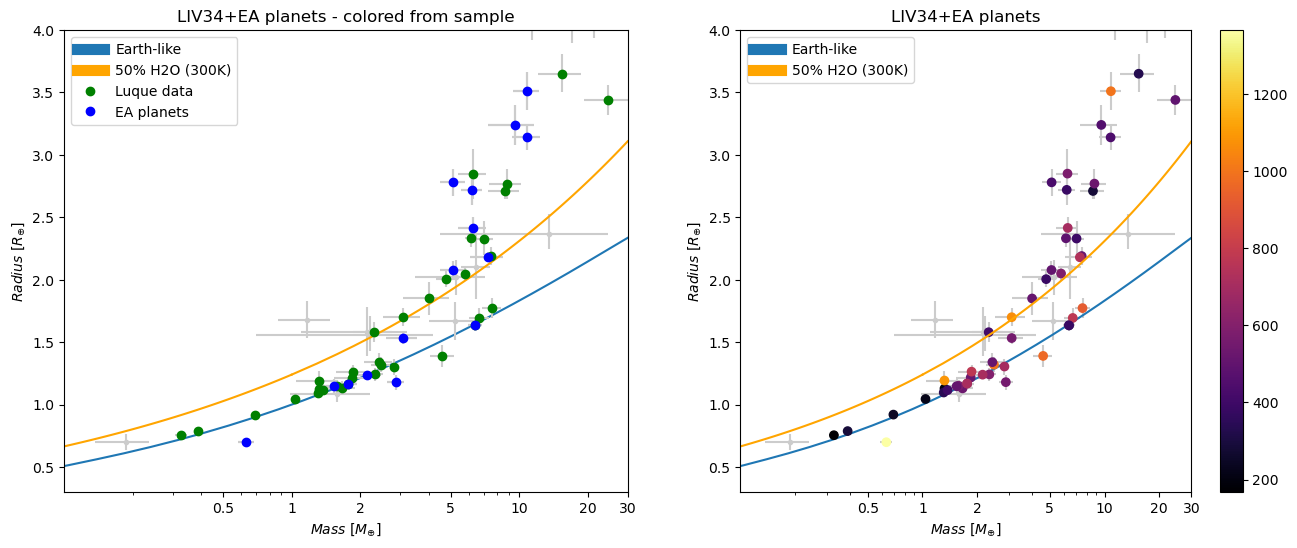

In [11]:
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot base1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'GJ 3053 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'CD-60 8051 b', 'L 98-59 c', 'L 98-59 d', 'GJ 3053 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b']

def find_index(planet_name):
    index = planet_name_LI.index(planet_name)
    return index

index_list = []
for i in range(0,len(planets)):
    planet  = planets[i]
    index   = find_index(planet)
    index_list.append(index)

mass_err_EA       = [abs(mass_unc_low_EA[EA_add_index]),mass_unc_up_EA[EA_add_index]]
radius_err_EA     = [abs(radius_unc_low_EA[EA_add_index]),radius_unc_up_EA[EA_add_index]]

plt.errorbar(mass_EA[EA_add_index],radius_EA[EA_add_index],xerr = mass_err_EA, yerr=radius_err_EA,fmt='.',color = "0.8",zorder=-32)
plt.plot(list(earth_like_rocky["Mass"]),list(earth_like_rocky["Radius"]),"-",label = "Earth-like",zorder=-32)
mass_lists_h20 = np.linspace(0,1,100)
x = 0.5
radus_list_h20 = (1+0.55*x-0.14*x**2)* mass_lists_h20**(1/3.7)
plt.plot(mass_lists_h20,radus_list_h20,"-",color = "orange",label = "50% H2O (300K)",zorder=-32)
mass_lists_h20 = np.linspace(1,30,100)
x = 0.5
radus_list_h20 = (1+0.55*x-0.14*x**2)* mass_lists_h20**(1/3.7)
plt.plot(mass_lists_h20,radus_list_h20,"-",color = "orange")
has_temp_eq_id = []
mass_temp      = []
radius_temp    = []
pl_temp        = []
for i in index_list:
    if pl_eq_LI[i] != "NaN":
        mass_temp.append(mass_LI[i])
        radius_temp.append(radius_LI[i])
        pl_temp.append(pl_eq_LI[i])
        
for i in EA_add_index:
    if pl_eq_EA[i] != "NaN":
        mass_temp.append(mass_EA[i])
        radius_temp.append(radius_EA[i])
        pl_temp.append(pl_eq_EA[i]) 

        
mass_err_LI       = [mass_unc_low_LI,mass_unc_up_LI]
radius_err_LI     = [radius_unc_low_LI,radius_unc_up_LI]

plt.plot(mass_LI[index_list], radius_LI[index_list],'.',color = "g",label= "Luque data",markersize = 12)
plt.errorbar(mass_LI, radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.',color = "0.8",zorder=-32)
plt.plot(mass_EA[EA_add_index],radius_EA[EA_add_index],"b.",label = "EA planets",markersize = 12)
mass_err_EA       = [abs(mass_unc_low_EA[EA_add_index]),mass_unc_up_EA[EA_add_index]]
radius_err_EA     = [abs(radius_unc_low_EA[EA_add_index]),radius_unc_up_EA[EA_add_index]]
plt.errorbar(mass_EA[EA_add_index],radius_EA[EA_add_index],xerr = mass_err_EA, yerr=radius_err_EA,fmt='.',color = "0.8",zorder=-32)

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log")
plt.xlim(0.1,30)
plt.ylim(0.3,4)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("STPMs Luque Improved sample - 34 visually chosen")

#plt.plot(mass_EA[4680],radius_EA[4680],"bx",label = "marked",zorder=-1,markersize = 10)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("LIV34+EA planets - colored from sample")

plt.subplot(1,2,2)

plt.errorbar(mass_LI, radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.',color = "0.8",zorder=-32)
plt.errorbar(mass_EA[EA_add_index],radius_EA[EA_add_index],xerr = mass_err_EA, yerr=radius_err_EA,fmt='.',color = "0.8",zorder=-32)
plt.plot(list(earth_like_rocky["Mass"]),list(earth_like_rocky["Radius"]),"-",label = "Earth-like",zorder=-32)
mass_lists_h20 = np.linspace(0,1,100)
x = 0.5
radus_list_h20 = (1+0.55*x-0.14*x**2)* mass_lists_h20**(1/3.7)
plt.plot(mass_lists_h20,radus_list_h20,"-",color = "orange",label = "50% H2O (300K)",zorder=-32)
mass_lists_h20 = np.linspace(1,30,100)
x = 0.5
radus_list_h20 = (1+0.55*x-0.14*x**2)* mass_lists_h20**(1/3.7)
plt.plot(mass_lists_h20,radus_list_h20,"-",color = "orange")

norm = plt.Normalize(min(pl_temp), max(pl_temp))
cmap = plt.cm.get_cmap('inferno')
plt.scatter(mass_temp, radius_temp, c=pl_temp, cmap=cmap, norm=norm, marker='o')
cbar = plt.colorbar()

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log")
plt.xlim(0.1,30)
plt.ylim(0.3,4)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("LIV34+EA planets")
plt.show()

## Density plots - Fit and plot

(0.07821766852036767, 30)

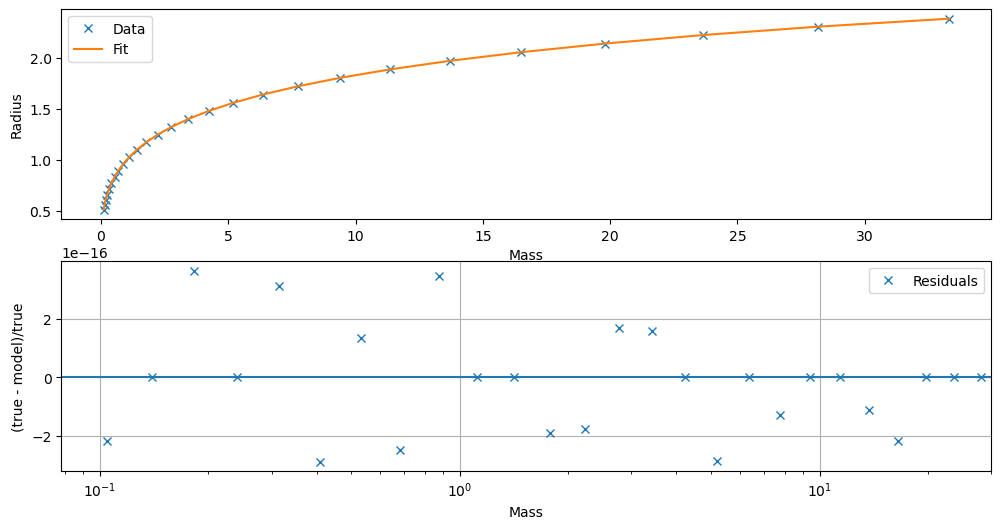

In [12]:
earth_density    = 5.51   # [g/cm**3]
Earth_Mass       = 5.972*10e27 # g
Earth_Radius     = 6.371*10e8  # cm
Earth_Volume     = 1.08321*10e27

def predict_radius(mass,radius):
    tck = interpolate.splrep(mass, radius)
    return interpolate.splev(mass, tck)

def calculate_density(exoplanet_mass, exoplanet_radius):
    return Earth_Mass*exoplanet_mass / (Earth_Volume*(exoplanet_radius**3))

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.subplot(2, 1, 1)  # 1 row, 2 columns, first subplot
radius_data = earth_like_rocky["Radius"]  
mass_data   = earth_like_rocky["Mass"]  # Mass data
earth_like_rocky_radius = []
earth_like_rocky_mass   = []
for i in range(0,len(mass_data)):
    if mass_data[i] < 35 and mass_data[i]> 0.1 :
        earth_like_rocky_radius.append(radius_data[i])
        earth_like_rocky_mass.append(mass_data[i])

x = earth_like_rocky_mass
y = earth_like_rocky_radius

plt.plot(x,y,"x",label = "Data")
plt.plot(x,predict_radius(x,y),label = "Fit")
plt.ylabel('Radius')
plt.xlabel('Mass')
plt.legend()

plt.subplot(2, 1, 2)  # 1 row, 2 columns, first subplot
plt.plot(x, (y-predict_radius(x,y))/y, "x",label = "Residuals")
plt.legend()
plt.grid(True)
plt.hlines(0,-5,35)
plt.xlabel('Mass')
plt.ylabel('(true - model)/true')
plt.xscale("log")
plt.xlim(-0.2,30)

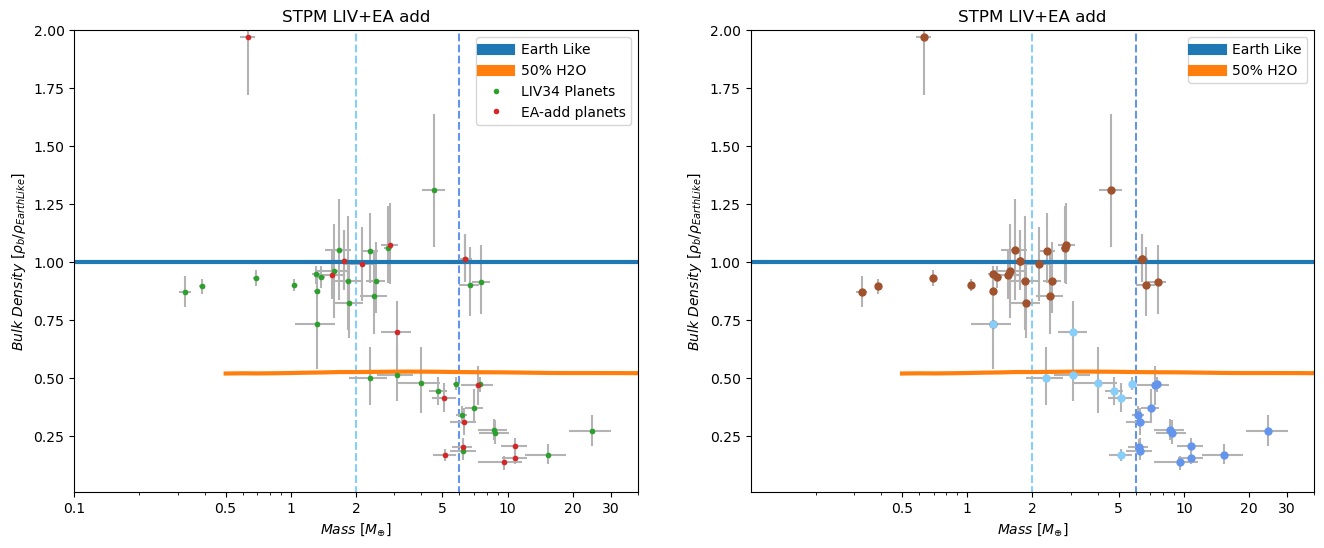

In [13]:
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
def predict_radius(mass):
    tck = interpolate.splrep(earth_like_rocky["Mass"], earth_like_rocky["Radius"] )
    return interpolate.splev(mass, tck)

tck = interpolate.splrep(earth_like_rocky["Mass"], earth_like_rocky["Radius"] )

def find_normal_density(mass_data,radius_data):
    density_true     = calculate_density(mass_data,radius_data)
    mass_list        = mass_data
    radius_list      = predict_radius(mass_data)
    density_normal   = calculate_density(mass_data,interpolate.splev(mass_data, tck))
    return density_true, density_normal

# Earth-Like line
radius_data = earth_like_rocky["Radius"]  
mass_data   = earth_like_rocky["Mass"]  # Mass data
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "Earth Like",linewidth=3)

mass_data   = H20_50_300K["Mass"]   
radius_data = H20_50_300K["Radius"]  
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "50% H2O",linewidth=3)

###### LI ######
mass_data           = mass_LI[index_list]
radius_data         = radius_LI[index_list]
_, density_normal = find_normal_density(mass_data,radius_data)

mass_up_lim_LI      = dataLI.euM_Mterra[index_list]
mass_low_lim_LI     = dataLI.edM_Mterra[index_list]
mass_err_LI         = [mass_low_lim_LI ,mass_up_lim_LI]

density_true        = density_LI[index_list]
density_up_lim_LI   = dataLI[dataLI.columns[33]][index_list]
density_low_lim_LI  = dataLI[dataLI.columns[34]][index_list]
density_err_LI      = [density_low_lim_LI / density_normal,density_up_lim_LI / density_normal]

plt.plot(mass_data,density_true/density_normal,".",label = "LIV34 Planets",linewidth=3)
plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

#### EA #####
mass_data           = mass_EA[EA_add_index]
radius_data         = radius_EA[EA_add_index]
_, density_normal   = find_normal_density(mass_data,radius_data)
density_true        = density_EA[EA_add_index]

mass_err_EA         = [abs(mass_unc_low_EA[EA_add_index]),mass_unc_up_EA[EA_add_index]]
density_err_EA      = [abs(density_unc_low_EA[EA_add_index])/density_normal, density_unc_up_EA[EA_add_index]/density_normal]  

plt.plot(mass_data,density_true/density_normal,".",label = "EA-add planets",linewidth=3)
plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_EA, yerr = density_err_EA, fmt = ".", color = "0.7",zorder = -30)

plt.title("STPM LIV+EA add")
plt.xscale("log")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth Like}]$")
plt.xscale("log")
leg = plt.legend()
plt.ylim(0.01,2)
plt.xlim(0.1,40)
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
    
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot

def predict_radius(mass):
    tck = interpolate.splrep(earth_like_rocky["Mass"], earth_like_rocky["Radius"] )
    return interpolate.splev(mass, tck)

tck = interpolate.splrep(earth_like_rocky["Mass"], earth_like_rocky["Radius"] )

def find_normal_density(mass_data,radius_data):
    density_true     = calculate_density(mass_data,radius_data)
    mass_list        = mass_data
    radius_list      = predict_radius(mass_data)
    density_normal   = calculate_density(mass_data,interpolate.splev(mass_data, tck))
    return density_true, density_normal

rocky_density = []
water_density = []
puffy_density = []
# Earth-Like line
radius_data = earth_like_rocky["Radius"]  
mass_data   = earth_like_rocky["Mass"]  # Mass data
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "Earth Like",linewidth=3)
earth_like_mean_density  = np.mean(density_true/density_normal)

mass_data   = H20_50_300K["Mass"]   
radius_data = H20_50_300K["Radius"]  
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "50% H2O",linewidth=3)
H2O_50_300K_mass_mean_density = np.mean(density_true/density_normal)
###### LI ######
mass_data           = mass_LI[index_list]
radius_data         = radius_LI[index_list]
_, density_normal = find_normal_density(mass_data,radius_data)

mass_up_lim_LI      = dataLI.euM_Mterra[index_list]
mass_low_lim_LI     = dataLI.edM_Mterra[index_list]
mass_err_LI         = [mass_low_lim_LI ,mass_up_lim_LI]

density_true        = density_LI[index_list]
density_up_lim_LI   = dataLI[dataLI.columns[33]][index_list]
density_low_lim_LI  = dataLI[dataLI.columns[34]][index_list]
density_err_LI      = [density_low_lim_LI / density_normal,density_up_lim_LI / density_normal]

plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

for i in range(0,len(mass_data)):
    dist_H2O = list(density_true/density_normal)[i] - H2O_50_300K_mass_mean_density
    dist_EL  = earth_like_mean_density - list(density_true/density_normal)[i]
    
    if list(mass_data)[i] <= 2 or dist_EL < dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "sienna",markersize = 10,zorder = 10)
        rocky_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] <= 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "lightskyblue",markersize = 10,zorder = 10)
        water_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] > 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "cornflowerblue",markersize = 10,zorder = 10)
        puffy_density.append(list(density_true/density_normal)[i])
### EA #####
mass_data           = mass_EA[EA_add_index]
radius_data         = radius_EA[EA_add_index]
_, density_normal   = find_normal_density(mass_data,radius_data)
density_true        = density_EA[EA_add_index]

mass_err_EA         = [abs(mass_unc_low_EA[EA_add_index]),mass_unc_up_EA[EA_add_index]]
density_err_EA      = [abs(density_unc_low_EA[EA_add_index])/density_normal, density_unc_up_EA[EA_add_index]/density_normal]  

plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_EA, yerr = density_err_EA, fmt = ".", color = "0.7",zorder = -30)

for i in range(0,len(mass_data)):
    dist_H2O = list(density_true/density_normal)[i] - H2O_50_300K_mass_mean_density
    dist_EL  = earth_like_mean_density - list(density_true/density_normal)[i]
    if list(mass_data)[i] <= 2 or dist_EL < dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "sienna",markersize = 10,zorder = 10)
        rocky_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] <= 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "lightskyblue",markersize = 10,zorder = 10)
        water_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] > 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "cornflowerblue",markersize = 10,zorder = 10)
        puffy_density.append(list(density_true/density_normal)[i])

#### Layout ####
plt.title("STPM LIV+EA add")
plt.xscale("log")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth Like}]$")
plt.xscale("log")
leg = plt.legend()
plt.ylim(0.01,2)
plt.xlim(0.1,40)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
    
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)

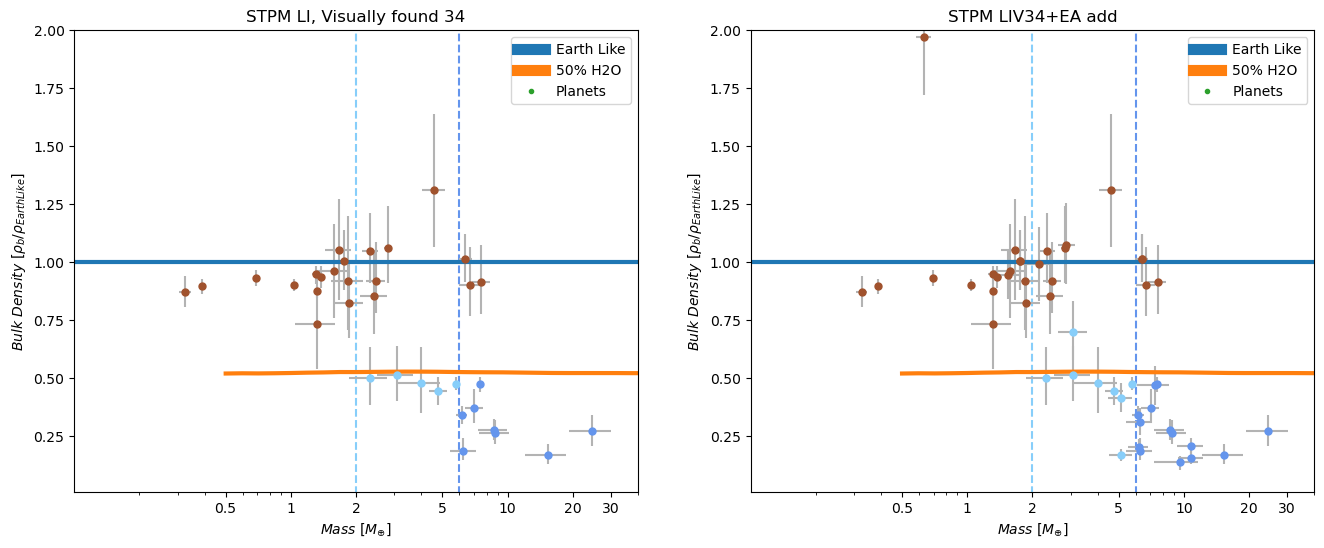

In [15]:
def predict_radius(mass):
    tck = interpolate.splrep(earth_like_rocky["Mass"], earth_like_rocky["Radius"] )
    return interpolate.splev(mass, tck)

tck = interpolate.splrep(earth_like_rocky["Mass"], earth_like_rocky["Radius"] )

def find_normal_density(mass_data,radius_data):
    density_true     = calculate_density(mass_data,radius_data)
    mass_list        = mass_data
    radius_list      = predict_radius(mass_data)
    density_normal   = calculate_density(mass_data,interpolate.splev(mass_data, tck))
    return density_true, density_normal

plt.figure(figsize=(16, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot

rocky_density_LI = []
water_density_LI = []
puffy_density_LI = []
# Earth-Like line
radius_data = earth_like_rocky["Radius"]  
mass_data   = earth_like_rocky["Mass"]  # Mass data
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "Earth Like",linewidth=3)
earth_like_mean_density  = np.mean(density_true/density_normal)

mass_data   = H20_50_300K["Mass"]   
radius_data = H20_50_300K["Radius"]  
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "50% H2O",linewidth=3)
H2O_50_300K_mass_mean_density = np.mean(density_true/density_normal)
###### LI ######
mass_data           = mass_LI[index_list]
radius_data         = radius_LI[index_list]
_, density_normal = find_normal_density(mass_data,radius_data)

mass_up_lim_LI      = dataLI.euM_Mterra[index_list]
mass_low_lim_LI     = dataLI.edM_Mterra[index_list]
mass_err_LI         = [mass_low_lim_LI ,mass_up_lim_LI]

density_true        = density_LI[index_list]
density_up_lim_LI   = dataLI[dataLI.columns[33]][index_list]
density_low_lim_LI  = dataLI[dataLI.columns[34]][index_list]
density_err_LI      = [density_low_lim_LI / density_normal,density_up_lim_LI / density_normal]

plt.plot(mass_data,density_true/density_normal,".",label = "Planets",linewidth=3)
plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

for i in range(0,len(mass_data)):
    dist_H2O = list(density_true/density_normal)[i] - H2O_50_300K_mass_mean_density +0.1
    dist_EL  = earth_like_mean_density - list(density_true/density_normal)[i]
    
    if list(mass_data)[i] <= 2 or dist_EL < dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "sienna",markersize = 10,zorder = 10)
        rocky_density_LI.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] <= 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "lightskyblue",markersize = 10,zorder = 10)
        water_density_LI.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] > 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "cornflowerblue",markersize = 10,zorder = 10)
        puffy_density_LI.append(list(density_true/density_normal)[i])

#### Layout ####
plt.title("STPM LI, Visually found 34")
plt.xscale("log")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth Like}]$")
plt.xscale("log")
leg = plt.legend()
plt.ylim(0.01,2)
plt.xlim(0.1,40)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
    
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)


plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
rocky_density = []
water_density = []
puffy_density = []
# Earth-Like line
radius_data = earth_like_rocky["Radius"]  
mass_data   = earth_like_rocky["Mass"]  # Mass data
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "Earth Like",linewidth=3)
earth_like_mean_density  = np.mean(density_true/density_normal)

mass_data   = H20_50_300K["Mass"]   
radius_data = H20_50_300K["Radius"]  
density_true, density_normal = find_normal_density(mass_data,radius_data)
plt.plot(mass_data,density_true/density_normal,"-",label = "50% H2O",linewidth=3)
H2O_50_300K_mass_mean_density = np.mean(density_true/density_normal)



###### LI ######
mass_data           = mass_LI[index_list]
radius_data         = radius_LI[index_list]
_, density_normal = find_normal_density(mass_data,radius_data)

mass_up_lim_LI      = dataLI.euM_Mterra[index_list]
mass_low_lim_LI     = dataLI.edM_Mterra[index_list]
mass_err_LI         = [mass_low_lim_LI ,mass_up_lim_LI]

density_true        = density_LI[index_list]
density_up_lim_LI   = dataLI[dataLI.columns[33]][index_list]
density_low_lim_LI  = dataLI[dataLI.columns[34]][index_list]
density_err_LI      = [density_low_lim_LI / density_normal,density_up_lim_LI / density_normal]

plt.plot(mass_data,density_true/density_normal,".",label = "Planets",linewidth=3)
plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

for i in range(0,len(mass_data)):
    dist_H2O = list(density_true/density_normal)[i] - H2O_50_300K_mass_mean_density +0.1
    dist_EL  = earth_like_mean_density - list(density_true/density_normal)[i]
    
    if list(mass_data)[i] <= 2 or dist_EL < dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "sienna",markersize = 10,zorder = 10)
        rocky_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] <= 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "lightskyblue",markersize = 10,zorder = 10)
        water_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] > 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "cornflowerblue",markersize = 10,zorder = 10)
        puffy_density.append(list(density_true/density_normal)[i])
### EA #####
mass_data           = mass_EA[EA_add_index]
radius_data         = radius_EA[EA_add_index]
_, density_normal   = find_normal_density(mass_data,radius_data)
density_true        = density_EA[EA_add_index]

mass_err_EA         = [abs(mass_unc_low_EA[EA_add_index]),mass_unc_up_EA[EA_add_index]]
density_err_EA      = [abs(density_unc_low_EA[EA_add_index])/density_normal, density_unc_up_EA[EA_add_index]/density_normal]  

plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_EA, yerr = density_err_EA, fmt = ".", color = "0.7",zorder = -30)

for i in range(0,len(mass_data)):
    dist_H2O = list(density_true/density_normal)[i] - H2O_50_300K_mass_mean_density
    dist_EL  = earth_like_mean_density - list(density_true/density_normal)[i]
    if list(mass_data)[i] <= 2 or dist_EL < dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "sienna",markersize = 10,zorder = 10)
        rocky_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] <= 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "lightskyblue",markersize = 10,zorder = 10)
        water_density.append(list(density_true/density_normal)[i])
    if list(mass_data)[i] > 6 and dist_EL > dist_H2O:
        plt.plot(list(mass_data)[i],list(density_true/density_normal)[i],".",color = "cornflowerblue",markersize = 10,zorder = 10)
        puffy_density.append(list(density_true/density_normal)[i])

#### Layout ####
plt.title("STPM LIV34+EA add")
plt.xscale("log")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth Like}]$")
plt.xscale("log")
leg = plt.legend()
plt.ylim(0.01,2)
plt.xlim(0.1,40)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
    
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)

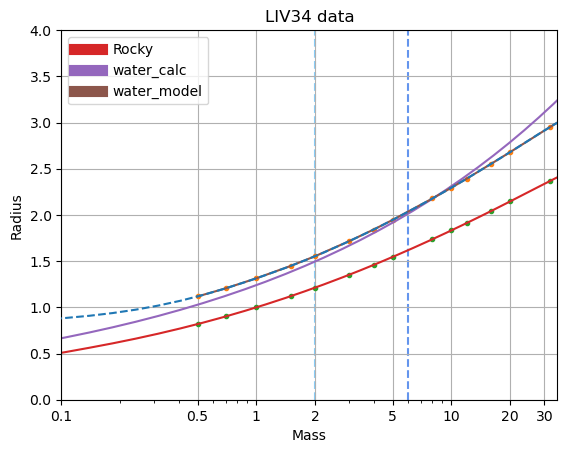

In [449]:
from scipy import interpolate

def spline_earth_like(x):
    x_points = earth_like_rocky["Mass"]
    y_points = earth_like_rocky["Radius"]
    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

def spline_h20_300K(x):
    x_points = H20_50_300K["Mass"]
    y_points = H20_50_300K["Radius"]
    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

def spline_h20_500K(x):
    x_points = H20_50_500K["Mass"]
    y_points = H20_50_500K["Radius"]
    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

def spline_h20_calc(x):
    x_points = earth_like_rocky["Mass"]
    y_points = 1.24 * np.power(masses_,1/3.7)
    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

earth_like_rocky_mass    = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius  = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density = (earth_like_rocky_mass) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius,3))   ) 

masses_ = earth_like_rocky["Mass"]
radiii  = 1.24 * np.power(masses_,1/3.7)
H20_50_calc_mass         = earth_Mass*masses_
H20_50_calc_radius       = earth_Radius*radiii
H20_50_calc_density      = (H20_50_calc_mass) / ((4/3)*(np.pi)*(np.power(H20_50_calc_radius,3))   )

H20_50_500K_mass         = earth_Mass*np.array(H20_50_500K["Mass"])
earth_like_density       = spline_earth_like(H20_50_500K["Mass"])
H20_50_500K_radius       = earth_Radius*np.array(H20_50_500K["Radius"])
H20_50_500K_density      = (H20_50_500K_mass) / ((4/3)*(np.pi)*(np.power(H20_50_500K_radius,3))   )

H20_500K_radius = spline_h20_500K(earth_like_rocky["Mass"])
plt.plot(earth_like_rocky["Mass"],H20_500K_radius, "--",zorder = 10)

plt.plot(H20_50_500K["Mass"],H20_50_500K["Radius"],".")
plt.plot(H20_50_500K["Mass"],earth_like_radius,".")
plt.plot(earth_like_rocky["Mass"],earth_like_rocky["Radius"],label = "Rocky")
plt.plot(masses_,radiii, label = "water_calc")
plt.plot(H20_50_500K["Mass"],H20_50_500K["Radius"],label = "water_model")
plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,4), plt.xlim(0.3,35); plt.legend()
plt.ylabel('Radius')
plt.legend()
plt.grid(True)
plt.title('LIV34 data')
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)

leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.grid(True)
plt.title('LIV34 data')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,4,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,4,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)
#image_name = 'LIV34_RM.png'
#image_format = 'png'

#fig.savefig(image_name, format=image_format, dpi=1200)



In [451]:
planet2      = []; planet_i2       = []; planet_eq2   = []
disc_year2   = []; st_eff2         = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []

radius2 = []
planet2 = []
for i in range(0,len(planet_name_EA)):
    if radius_EA[i]<4 and st_eff_EA[i] < 3500:
        if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
                st_eff2.append(st_eff_EA[i])
                planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i]); disc_year2.append(disc_year_EA[i])
                radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
                density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
                mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])
                

NameError: name 'st_eff_EA' is not defined

ValueError: x and y must have same first dimension, but have shapes (10,) and (34,)

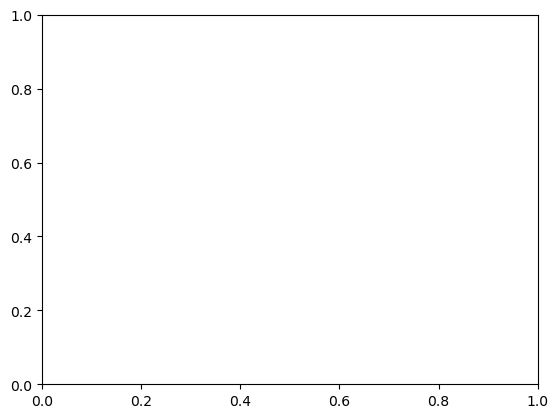

In [450]:
x = mass_data
y = density_true/density_normal

plt.plot(x,y,".")

plt.plot(earth_like_rocky["Mass"],earth_like_rocky_density/earth_like_rocky_density,label = "Rocky",color = "darkgreen")
plt.plot(earth_like_rocky["Mass"],H20_50_calc_density/earth_like_rocky_density, label = "H2O 50% calculated", color= "steelblue",zorder = 10)
plt.plot(earth_like_rocky["Mass"],H20_50_500K_density/earth_like_rocky_density,label = "H20 50% (500K)",color = "salmon",zorder = 10)
plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,1.4), plt.xlim(0.1,30); plt.legend()
plt.ylabel('Density')
plt.grid(True)
plt.title('LIV34 data')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)

leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

TypeError: 'Series' object is not callable

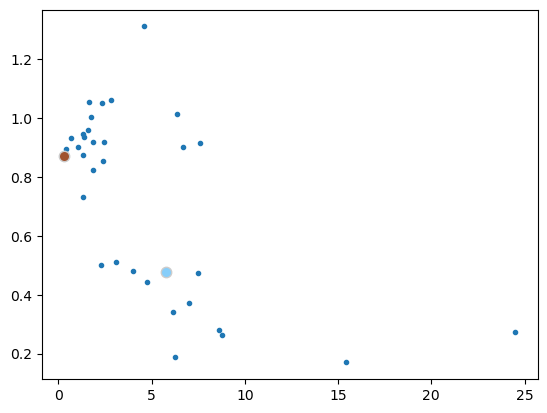

In [369]:
for i in range(0,len(x)):
    location_y_H2O.append(h20calc_density(x[i]))
    location_y_rocky.append(rocky_density(x[i]))

# Calculate the distances for all data points
dist_rocky = [abs(location_y_rocky[i] - y[i]) for i in range(len(x))]
dist_y_H2O = [abs(y[i] - location_y_H2O[i]) for i in range(len(x))]

rocky_density = []
water_density = []
puffy_density = []

# Iterate over the data points
for i in range(0,len(x)):
    if dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".")
    if x[i] <= 2 or dist_rocky[i] < dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "sienna",markersize = 15,zorder = 10,mec="0.8")
        rocky_density.append(list(density_true/density_normal)[i])
    if x[i] <= 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "lightskyblue",markersize = 15,zorder = 10,mec="0.8")
    if x[i] > 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "cornflowerblue",markersize = 15,zorder = 10,mec="0.8")

plt.errorbar(mass_data,density_true/density_normal,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

plt.plot()
plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,1.4), plt.xlim(0.1,30); plt.legend()
plt.ylabel('Density')
plt.grid(True)
plt.title('LIV34 data')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)


density_up_lim_LI   = dataLI[dataLI.columns[33]][index_list]
density_low_lim_LI  = dataLI[dataLI.columns[34]][index_list]
density_err_LI      = [density_low_lim_LI / density_normal,density_up_lim_LI / density_normal]



ValueError: operands could not be broadcast together with shapes (15,) (49,) 

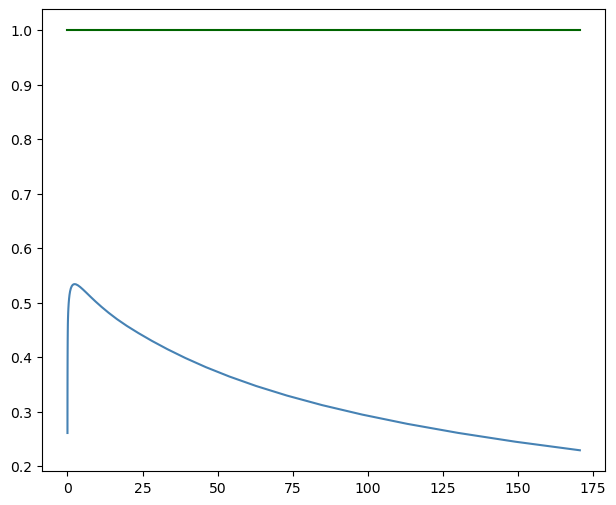

In [465]:
def rocky_density(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density/earth_like_rocky_density
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def h20calc_density(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = H20_50_calc_density/earth_like_rocky_density
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def h20model_density(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = H20_50_500K_density/earth_like_rocky_density
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(earth_like_rocky["Mass"],earth_like_rocky_density/earth_like_rocky_density,label = "Rocky",color = "darkgreen")
plt.plot(earth_like_rocky["Mass"],H20_50_calc_density/earth_like_rocky_density, label = "H2O 50% calculated", color= "steelblue",zorder = 10)
plt.plot(earth_like_rocky["Mass"],H20_50_500K_density/earth_like_rocky_density,label = "H20 50% (500K)",color = "salmon",zorder = 10)

x = np.array(mass_LI[index_list]); y = np.array(density_true/density_normal)
plt.plot(x,y,"."); plt.errorbar(x,y,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

mass_data = np.linspace(1, 30, 10)
location_y_H2O = []; location_y_rocky = []

for i in range(0,len(x)):
    location_y_H2O.append(h20calc_density(x[i]))
    location_y_rocky.append(rocky_density(x[i]))

dist_rocky = [abs(location_y_rocky[i] - y[i]) for i in range(len(x))]
dist_y_H2O = [abs(y[i] - location_y_H2O[i]) for i in range(len(x))]
 
density_rocky_equation        = []
density_weight_rocky_equation = []
density_water_equation        = []
density_weight_water_equation = []
density_puffy_equation        = []
density_weight_puffy_equation = []

for i in range(0,len(x)):
    if dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".")
    if x[i] <= 2 or dist_rocky[i] < dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "sienna",markersize = 15,zorder = 10,mec="0.8")
        density_rocky_equation.append(y[i])
        density_weight_rocky_equation.append(1.0 / np.sqrt(( (density_err_LI[0].tolist()[i])** 2 + density_err_LI[1].tolist()[i] ** 2)))
    if x[i] <= 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "lightskyblue",markersize = 15,zorder = 10,mec="0.8")
        density_water_equation.append(y[i])
        density_weight_water_equation.append(1.0 / np.sqrt(( (density_err_LI[0].tolist()[i])** 2 + density_err_LI[1].tolist()[i] ** 2)))
    if x[i] > 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "cornflowerblue",markersize = 15,zorder = 10,mec="0.8")
        density_puffy_equation.append(y[i])
        density_weight_puffy_equation.append(1.0 / np.sqrt(( (density_err_LI[0].tolist()[i])** 2 + density_err_LI[1].tolist()[i] ** 2)))

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,1.4), plt.xlim(0.1,30); plt.ylabel('Density')
plt.grid(True); plt.title('LIV34 - distance: Equation')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
plt.plot(earth_like_rocky["Mass"],earth_like_rocky_density/earth_like_rocky_density,label = "Rocky",color = "darkgreen")
plt.plot(earth_like_rocky["Mass"],H20_50_calc_density/earth_like_rocky_density, label = "H2O 50% calculated", color= "steelblue",zorder = 10)
plt.plot(earth_like_rocky["Mass"],H20_50_500K_density/earth_like_rocky_density,label = "H20 50% (500K)",color = "salmon",zorder = 10)

x = np.array(mass_LI[index_list]); y = np.array(density_true/density_normal)
plt.plot(x,y,"."); 
plt.errorbar(x,y,xerr = mass_err_LI, yerr = density_err_LI, fmt = ".", color = "0.7",zorder = -30)

mass_data = np.linspace(1, 30, 10)
location_y_H2O = []; location_y_rocky = []

for i in range(0,len(x)):
    location_y_H2O.append(h20model_density(x[i]))
    location_y_rocky.append(rocky_density(x[i]))

dist_rocky = [abs(location_y_rocky[i] - y[i]) for i in range(len(x))]
dist_y_H2O = [abs(y[i] - location_y_H2O[i]) for i in range(len(x))]

density_rocky_model          = []
density_weight_rocky_model   = []
density_water_model          = []
density_weight_water_model   = []
density_puffy_model          = []
density_weight_puffy_model   = []

for i in range(0,len(x)):
    if dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".")
    if x[i] <= 2 or dist_rocky[i] < dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "sienna",markersize = 15,zorder = 10,mec="0.8")
        density_rocky_model.append(y[i])
        density_weight_rocky_model.append(1.0 / np.sqrt(( (density_err_LI[0].tolist()[i])** 2 + density_err_LI[1].tolist()[i] ** 2)))
    if x[i] <= 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "lightskyblue",markersize = 15,zorder = 10,mec="0.8")
        density_water_model.append(y[i])
        density_weight_water_model.append(1.0 / np.sqrt(( (density_err_LI[0].tolist()[i])** 2 + density_err_LI[1].tolist()[i] ** 2)))
    if x[i] > 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(x[i],y[i],".",color = "cornflowerblue",markersize = 15,zorder = 10,mec="0.8")
        density_puffy_model.append(y[i])
        density_weight_puffy_model.append(1.0 / np.sqrt(( (density_err_LI[0].tolist()[i])** 2 + density_err_LI[1].tolist()[i] ** 2)))

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,1.4), plt.xlim(0.1,30); plt.ylabel('Density')
plt.grid(True); plt.title('LIV34 - distance: Model')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)

leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

image_name = 'LIV34_RM_distance.png'
image_format = 'png'

fig.savefig(image_name, format=image_format, dpi=1200)

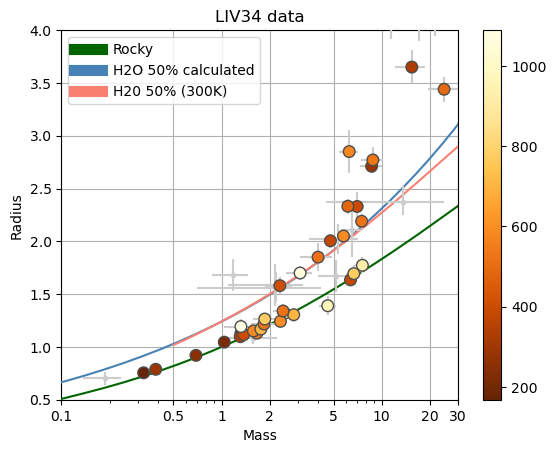

In [234]:
masses_ = earth_like_rocky["Mass"]
radiii  = 1.24 * np.power(masses_,1/3.7)
fig, ax = plt.subplots()

plt.plot(earth_like_rocky["Mass"],earth_like_rocky["Radius"],label = "Rocky",color = "darkgreen",zorder = 10)
plt.plot(masses_,radiii, label = "H2O 50% calculated", color= "steelblue",zorder = 10)
plt.plot(H20_50_300K["Mass"],H20_50_300K["Radius"],label = "H20 50% (300K)",color = "salmon",zorder = 10)

mass_err_LI       = [mass_unc_low_LI,mass_unc_up_LI]
radius_err_LI     = [radius_unc_low_LI,radius_unc_up_LI]
#plt.plot(mass_LI[index_list], radius_LI[index_list],'.',color = pl_eq_LI,label= "Luque data",markersize = 12)
plt.errorbar(mass_LI, radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.',color = "0.8",zorder = 20)

has_temp_eq_id = []
mass_temp      = []
radius_temp    = []
pl_temp        = []
for i in index_list:
    if pl_eq_LI[i] != "NaN":
        mass_temp.append(mass_LI[i])
        radius_temp.append(radius_LI[i])
        pl_temp.append(pl_eq_LI[i])

norm = plt.Normalize(min(pl_temp),max(pl_temp))
cmap = plt.cm.get_cmap('YlOrBr_r')
plt.scatter(mass_temp, radius_temp, c=pl_temp,edgecolors = "0.3", cmap=cmap, norm=norm, marker='o',zorder = 30,s=70)
cbar = plt.colorbar()

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0.5,4), plt.xlim(0.1,30); plt.legend()
plt.ylabel('Radius')
leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.grid(True)
plt.title('LIV34 data')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
#plt.vlines(2,0,4,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
#plt.vlines(6,0,4,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)
image_name = 'LIV34_RM_300K.png'
image_format = 'png'

fig.savefig(image_name, format=image_format, dpi=1200)


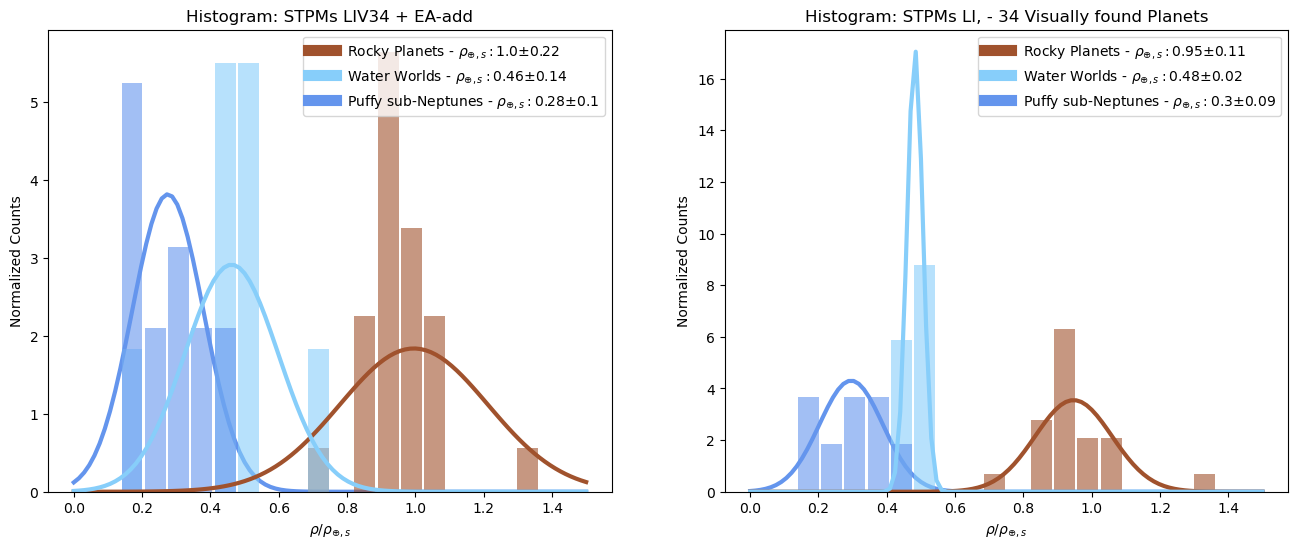

In [399]:
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

plt.hist(rocky_density, bins=bins, color='sienna', alpha=0.6,rwidth =0.9,density= True)
plt.hist(water_density, bins=bins, color='lightskyblue', alpha=0.6,rwidth =0.9,density= True)
plt.hist(puffy_density, bins=bins, color='cornflowerblue', alpha=0.6,rwidth =0.9,density= True)

mu, sigma = scipy.stats.norm.fit(rocky_density)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu, sigma = scipy.stats.norm.fit(water_density)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu, sigma = scipy.stats.norm.fit(puffy_density)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)


leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34 + EA-add')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

plt.hist(rocky_density_LI, bins=bins, color='sienna', alpha=0.6,rwidth =0.9,density= True)
plt.hist(water_density_LI, bins=bins, color='lightskyblue', alpha=0.6,rwidth =0.9,density= True)
plt.hist(puffy_density_LI, bins=bins, color='cornflowerblue', alpha=0.6,rwidth =0.9,density= True)

mu, sigma = scipy.stats.norm.fit(rocky_density_LI)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu, sigma = scipy.stats.norm.fit(water_density_LI)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu, sigma = scipy.stats.norm.fit(puffy_density_LI)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LI, - 34 Visually found Planets')
plt.show()

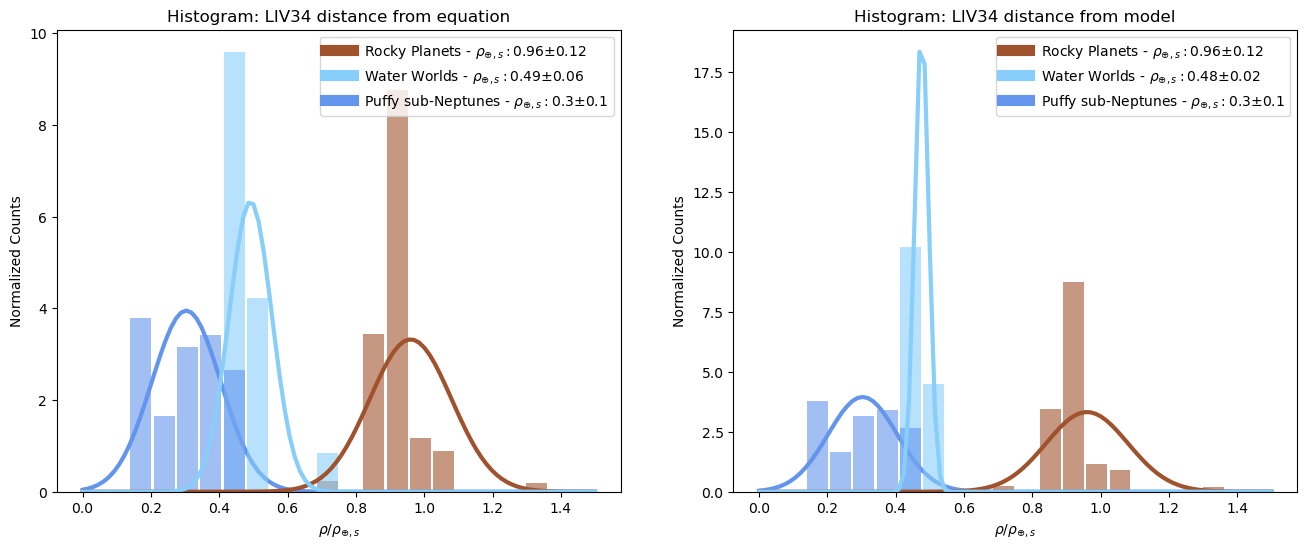

In [444]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

plt.hist(density_rocky_equation, bins=bins, color='sienna', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_rocky_equation)
plt.hist(density_water_equation, bins=bins, color='lightskyblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_water_equation)
plt.hist(density_puffy_equation, bins=bins, color='cornflowerblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_puffy_equation)

mu = np.average(density_rocky_equation, weights=density_rocky_equation)
sigma = np.sqrt(np.cov(density_rocky_equation, aweights=density_rocky_equation, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(density_water_equation, weights=density_weight_water_equation)
sigma = np.sqrt(np.cov(density_water_equation, aweights=density_weight_water_equation, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu = np.average(density_puffy_equation, weights=density_weight_puffy_equation)
sigma = np.sqrt(np.cov(density_puffy_equation, aweights=density_weight_puffy_equation, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: LIV34 distance from equation')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

plt.hist(density_rocky_model, bins=bins, color='sienna', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_rocky_model)
plt.hist(density_water_model, bins=bins, color='lightskyblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_water_model)
plt.hist(density_puffy_model, bins=bins, color='cornflowerblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_puffy_model)

mu = np.average(density_rocky_model, weights=density_rocky_model)
sigma = np.sqrt(np.cov(density_rocky_model, aweights=density_rocky_model, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(density_water_model, weights=density_weight_water_model)
sigma = np.sqrt(np.cov(density_water_model, aweights=density_weight_water_model, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu = np.average(density_puffy_model, weights=density_weight_puffy_model)
sigma = np.sqrt(np.cov(density_puffy_model, aweights=density_weight_puffy_model, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: LIV34 distance from model')
plt.show()

image_name = 'LIV34_hisotgram_distance.png'
image_format = 'png'

fig.savefig(image_name, format=image_format, dpi=1200)